In this case-study, we need to answer the __business question:__ 

### What are the main characteristics which have the most impact on the car price?



#### In this project: We'll answer the business question and then we build some machine learning (predicting) models

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Data-import

 Load data and store in dataframe df (and remove the first unexpected column):

In [2]:
df = pd.read_csv('clean_df.csv', index_col=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Analyzing Individual Feature Patterns (through visualization)

In [3]:
# list the data types for each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [4]:
# list the columns from the given dataset
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
# calculate the correlation between variables of type "int64" or "float64"
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Now we can focus on the specific columns and find their correlation: bore, stroke, compression-ratio, and horsepower

In [7]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


#### Continuous numerical variables: 
Let's see several examples of different linear relationships:

"engine-size" vs "price": __Positive linear relationship__

(40, 339.3875622782147)

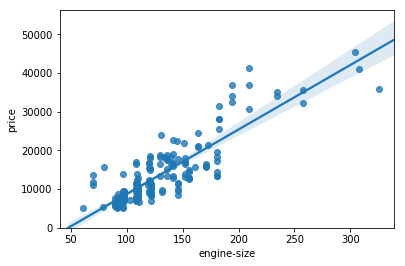

In [8]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.xlim(40,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. 

 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87:

In [9]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


"highway-mpg" vs "price": __Negative linear relationship__

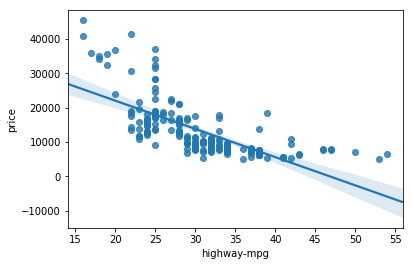

In [10]:
sns.regplot(x="highway-mpg", y="price", data=df)

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.704:

In [11]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


"peak-rpm" vs "price": __Weak Linear Relationship__

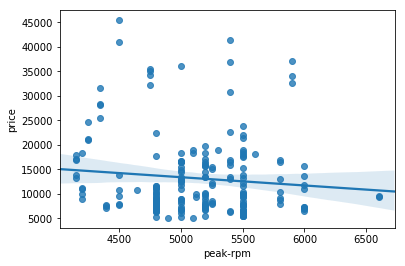

In [12]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it is not a reliable variable.


 We can examine the correlation between 'peak-rpm'  and 'price'and see it is approximately  -0.101616: 

In [13]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


We now find one more - the correlation between x="stroke", y="price":

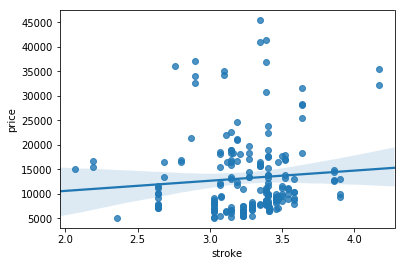

In [14]:
sns.regplot(x='stroke',y='price',data=df)

In [15]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


#### Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price":

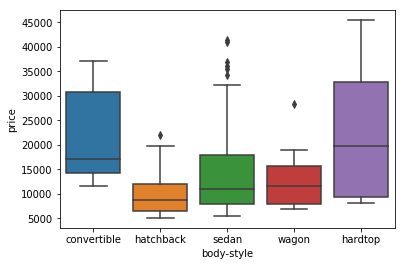

In [16]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. 

Let's examine engine "engine-location" and "price" :

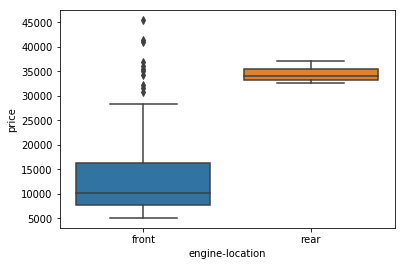

In [17]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price. 

 Let's examine "drive-wheels" and "price":

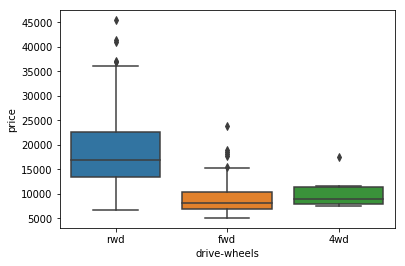

In [18]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

### Descriptive Statistical Analysis

Let's first take a look at the variables by utilising a description method. The **describe** function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics. 

Note: the IQR (Interquartile Range: 25%, 50% and 75%)

 We can apply the method "describe" as follows:

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [20]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


We can convert the series to a Dataframe as follows :

In [21]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True) 

# rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location':

In [22]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, creating a skewed result. Thus, we are not able to draw any conclusions about the engine location.

### Grouping

 The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

If we want to know, on average, which type of drive wheel is most valuable, we can group "body-style"/ "drive-wheels" and then average them.

We can then calculate the average price for each of the different categories of data:

In [23]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [24]:
body_group = df_group_one.groupby(['body-style'],as_index= False).mean()
body_group = np.around(body_group,2)
body_group.sort_values(by='price', ascending=False)

,body-style,price
1,hardtop,22208.50
0,convertible,21890.50
3,sedan,14459.76
4,wagon,12371.96
2,hatchback,9957.44


In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [26]:
dw_group = df_group_one.groupby(['drive-wheels'],as_index= False).mean()
dw_group = np.around(dw_group,2)
dw_group.sort_values(by='price', ascending=False)

,drive-wheels,price
2,rwd,19757.61
0,4wd,10241.00
1,fwd,9244.78


From the data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

We can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.

In [27]:
# grouping results

df_group_one = df[['drive-wheels','body-style','price']]
new_group = df_group_one.groupby(['drive-wheels','body-style'],as_index= False).mean()
new_group = np.around(new_group,2)
new_group.sort_values(by='price', ascending=False)

,drive-wheels,body-style,price
9,rwd,hardtop,24202.71
8,rwd,convertible,23949.60
11,rwd,sedan,21711.83
12,rwd,wagon,16994.22
10,rwd,hatchback,14337.78
1,4wd,sedan,12647.33
3,fwd,convertible,11595.00
7,fwd,wagon,9997.33
6,fwd,sedan,9811.80
2,4wd,wagon,9095.75


 This grouped data is much easier to visualize when it is made into a __pivot table__. 

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [28]:
# pivot table now and fill-in the missing values

grouped_pivot = new_group.pivot(index='drive-wheels',columns='body-style') 
grouped_pivot=grouped_pivot.fillna(0.00)   
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  0.0      0.00   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

Let's use a __heat map__ to visualize the relationship between Body Style vs Price: 

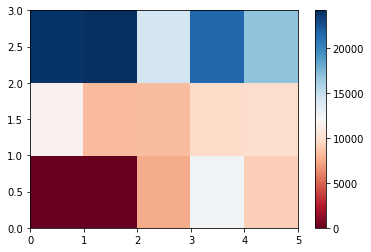

In [29]:
# basically plot as using the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'. 

Let's change the default labels into meaningful ones. 

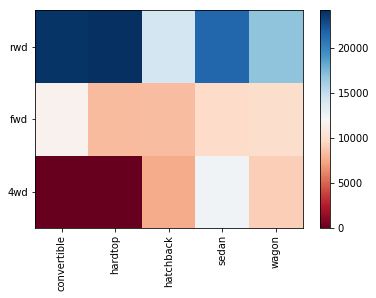

In [30]:
# heatmap

fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

To get a better measure of the important characteristics, we now look at the correlation of these variables with the car price. In other words, how is the car price dependent on this variable?

### Statistical: Correlation and Causation

It is important to know the difference between these two and that correlation does not imply causation. Determining  correlation is much simpler than determining causation, as causation may require independent experimentation.

The __Pearson Correlation__ measures the linear dependence between two variables, X and Y.
The resulting coefficient is a value between -1 (total negative linear correlation) and 1 (total positive linear correlation) and 0 (no linear correlation).

The __P-value__ is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. 

When the p-value is:
- < 0.001 we say there is strong evidence that the correlation is significant,
- < 0.05; there is moderate evidence that the correlation is significant,
- < 0.1; there is weak evidence that the correlation is significant, and
- is >  0.1; there is no evidence that the correlation is significant.

 We can obtain this information using  "stats" module in the "scipy"  library:

In [31]:
from scipy import stats

#### Wheel-base vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price':

In [32]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


__Conclusion:__ 
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

#### Horsepower vs Price

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price':

In [33]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)   ## ..<<===== 

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 6.36905742825998e-48


__Conclusion:__
Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

#### Length vs Price

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price':

In [34]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P = 8.016477466159053e-30


__Conclusion:__
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

#### Width vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [35]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481426e-38


__Conclusion:__
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

#### Curb-weight vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [36]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936997e-53


__Conclusion:__
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

#### Engine-size vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [53]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


__Conclusion:__
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

#### Bore vs Price

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [54]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935364e-17


__Conclusion:__
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

#### City-mpg vs Price

In [55]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.3211320655676368e-29


__Conclusion:__
Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

#### Highway-mpg vs Price

In [56]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144476807e-31


__Conclusion:__
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

### Statistical: ANOVA - Analysis of Variance
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells us the statistical significance of our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

#### Drive Wheels

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average ("mean") before-hand.

 Let's see if different types 'drive-wheels' impact  'price'. We group the data:

In [57]:
no_mean_group = df[['drive-wheels','price']].groupby(['drive-wheels'])
no_mean_group.head(3)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
136,4wd,7603.0
140,4wd,9233.0


We can obtain the values of the method group using the method "get_group":

In [58]:
X = no_mean_group.get_group('4wd')['price'] 
X

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

We now can obtain the **F-test score** and **P-value** by using the function 'f_oneway':

In [59]:
# ANOVA
f_val, p_val = stats.f_oneway(no_mean_group.get_group('fwd')['price'], no_mean_group.get_group('rwd')['price'], no_mean_group.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0, implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

Separately: __fwd and rwd:__

In [60]:
f_val, p_val = stats.f_oneway(no_mean_group.get_group('fwd')['price'], no_mean_group.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


 Let's examine the other groups: __4wd and rwd:__ 

In [61]:
f_val, p_val = stats.f_oneway(no_mean_group.get_group('4wd')['price'], no_mean_group.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


__4wd and fwd:__

In [62]:
f_val, p_val = stats.f_oneway(no_mean_group.get_group('4wd')['price'], no_mean_group.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


### Conclusion (feature engineering): Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

### We're now ready moving into building machine learning models to complete our analysis.

__Linear Regression__ (Multi-Features)

Let's focus on four of the variables from the foregoing conclusion

In [87]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.model_selection import train_test_split

In [88]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(Z, df['price'], random_state=0)

In [90]:
 lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
Ym = lm.predict(X_test)
Ym[0:5]

array([ 5310.70559576, 10398.26258686, 19737.17717544, 21356.95153283,
       20518.14448994])

In [92]:
lm.intercept_, lm.coef_

(-15209.724828209095,
 array([31.67531462,  6.24265343, 67.07501747, 13.20172798]))

Distribution plot using "distplot"

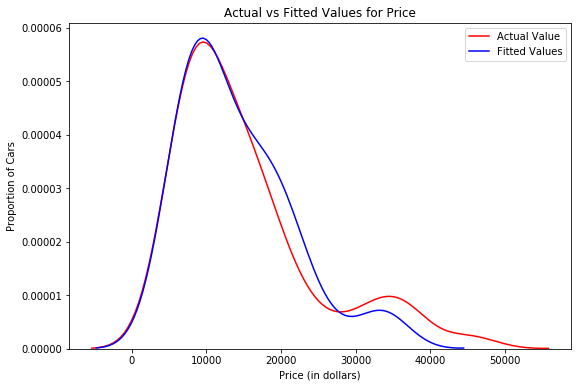

In [93]:
plt.figure(figsize=(9, 6))

##..distribution plot...
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Ym, hist=False, color="b", label="Fitted Values" , ax=ax1)     


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [95]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(X_train,y_train)

ypipe=pipe.predict(X_test)
ypipe[0:10]

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([ 5310.70559576, 10398.26258686, 19737.17717544, 21356.95153283,
       20518.14448994,  9444.74911996, 13377.13750068,  5831.58073237,
       17253.87621911,  7060.32462732])

Distribution plotting should be the same as above

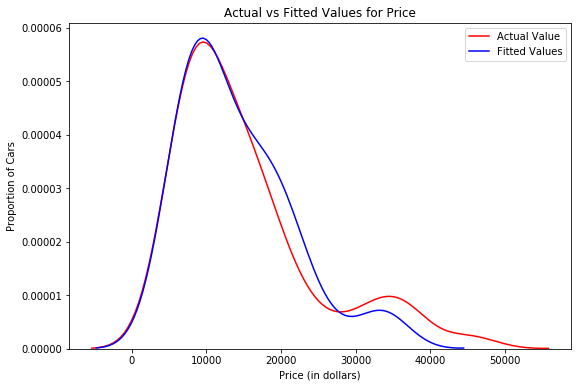

In [96]:
plt.figure(figsize=(9, 6))

##..distribution plot...
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)    


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can perform a polynomial transform on multiple features ( __Multi- Features Polynomial__)

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
pr=PolynomialFeatures(degree=2)

In [99]:
## depending on data, we can transform the X data..
X_pr=pr.fit_transform(X_train)
X_pr[0:5]

array([[1.000000e+00, 2.070000e+02, 2.756000e+03, 1.940000e+02,
        2.500000e+01, 4.284900e+04, 5.704920e+05, 4.015800e+04,
        5.175000e+03, 7.595536e+06, 5.346640e+05, 6.890000e+04,
        3.763600e+04, 4.850000e+03, 6.250000e+02],
       [1.000000e+00, 1.000000e+02, 2.300000e+03, 1.090000e+02,
        3.200000e+01, 1.000000e+04, 2.300000e+05, 1.090000e+04,
        3.200000e+03, 5.290000e+06, 2.507000e+05, 7.360000e+04,
        1.188100e+04, 3.488000e+03, 1.024000e+03],
       [1.000000e+00, 9.700000e+01, 2.302000e+03, 1.200000e+02,
        3.400000e+01, 9.409000e+03, 2.232940e+05, 1.164000e+04,
        3.298000e+03, 5.299204e+06, 2.762400e+05, 7.826800e+04,
        1.440000e+04, 4.080000e+03, 1.156000e+03],
       [1.000000e+00, 6.200000e+01, 2.280000e+03, 9.200000e+01,
        3.700000e+01, 3.844000e+03, 1.413600e+05, 5.704000e+03,
        2.294000e+03, 5.198400e+06, 2.097600e+05, 8.436000e+04,
        8.464000e+03, 3.404000e+03, 1.369000e+03],
       [1.000000e+00, 6.8000

Pipelining

In [102]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [103]:
pipe_pr=Pipeline(Input)
pipe_pr

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [104]:
pipe_pr.fit(X_train,y_train)

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bista\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [105]:
ypipe2 = pipe_pr.predict(X_test)
ypipe2[0:10]

C:\Users\bista\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([ 6535.48279906, 10247.81731112, 25061.46955839, 20531.81492053,
       18927.7611685 ,  8594.33462007, 12242.46386124,  6445.04722031,
       14728.1400615 ,  7062.58564695])

We can see the distribution plot is very close as above

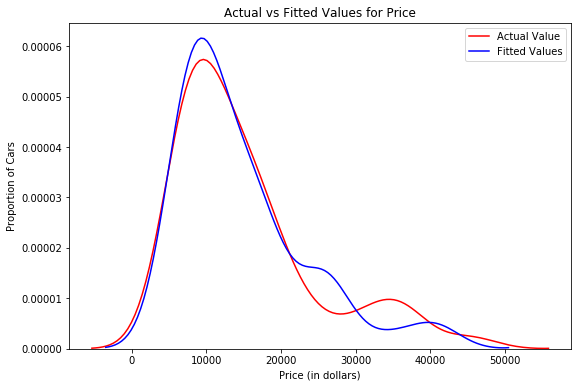

In [106]:
plt.figure(figsize=(9, 6))

##..distribution plot...
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe2, hist=False, color="b", label="Fitted Values" , ax=ax1)    


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

There are two very important __measures__ that are often used in Statistics to determine the accuracy of a model are:

- **R^2 / R-squared**
- **Mean Squared Error (MSE)**

Let's import the function mean_squared_error from the module metrics

In [107]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [108]:
mean_squared_error(y_test, Ym)  

18093381.51484114

In [109]:
mean_squared_error(y_test, ypipe2) 

19334267.56786299

__r2_score__

In [110]:
r_squared = r2_score(y_test, Ym)
r_squared

0.7963222161667765

In [111]:
r_squared = r2_score(y_test, ypipe2)
r_squared

0.7823535215332312

Another method to find R2-score:

In [112]:
# fit the model 
lm.fit(X_train, y_train)

# Find the R^2
lm.score(X_test, y_test)

0.7963222161667765

Multiple Linear Regression (MLR) vs Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also larger than for the Polynomial Fit.

Comparing these three models, we conclude that the MLR model is a better model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

Thank you.